# CNN Evaluation

From our paper on "Explainable Prediction of Acute Myocardial Infarction using Machine Learning and Shapley Values"

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import pylab as plt
from keras import optimizers, losses, activations, models, regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, Flatten, GlobalMaxPool1D, GlobalAveragePooling1D, \
    concatenate
from keras.utils import to_categorical
from keras.models import load_model, Sequential
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sns
import time

Using TensorFlow backend.


# Loading Data

In [2]:
# Load data
# Import train and test data into dataframes from csv files produced using the data processing code
df_cnn_train = pd.read_csv("/userhome/cs/zihaopu/0704/ecg-view-II-machine-learning-master/data processing/train.csv", header=None)
df_cnn_train = df_cnn_train.sample(frac=1)
df_cnn_test = pd.read_csv("/userhome/cs/zihaopu/0704/ecg-view-II-machine-learning-master/data processing/test.csv", header=None)

In [3]:
# Get data from dataframes
y_cnn = np.array(df_cnn_train[11].values).astype(np.int8)
y_cnn=to_categorical(y_cnn)
x_cnn = np.array(df_cnn_train[list(range(11))].values)[..., np.newaxis]
y_cnn_test = np.array(df_cnn_test[11].values).astype(np.int8)
x_cnn_test = np.array(df_cnn_test[list(range(11))].values)[..., np.newaxis]

# Model Evaluation + Confusion Matrix

In [4]:
start_time = time.time()

model = load_model('cnn_ecgview.h5')

y_pred = model.predict(x_cnn_test)
y_pred = np.argmax(y_pred, axis=-1)

print("--- inference time of %s seconds ---" % (time.time() - start_time))

# Get F1 score
f1 = f1_score(y_cnn_test, y_pred, average="macro")
print("Test f1 score : %s "% f1)

# Get ROC AUC
roc = roc_auc_score(y_cnn_test, y_pred)
print("Test ROC AUC score : %s "% roc)

# Get the accuracy
acc = accuracy_score(y_cnn_test, y_pred)
print("Test accuracy score : %s "% acc)

# Get the specificity
tn, fp, fn, tp = confusion_matrix(y_cnn_test, y_pred).ravel()
specificity = tn / (tn+fp)
print("Specificity : %s "% specificity)

# Get the sensitivity
sensitivity= tp / (tp+fn)
print("Sensitivity: %s "% sensitivity)

2022-07-04 18:01:57.607789: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-07-04 18:01:57.645302: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 18:01:57.646015: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:05:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-07-04 18:01:57.650532: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-07-04 18:01:57.711787: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-07-04 18:01:58.519455: I tensorflow/stream_executor

--- inference time of 14.749993562698364 seconds ---
Test f1 score : 0.7128554430027496 
Test ROC AUC score : 0.7059903830246966 
Test accuracy score : 0.7544567678996574 
Specificity : 0.8515501343207725 
Sensitivity: 0.5604306317286207 


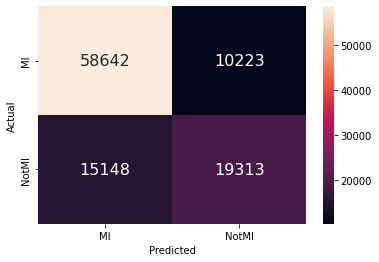

In [5]:
# Get the confusion matrix
confusion = confusion_matrix(y_cnn_test, y_pred)
sns.heatmap(data=confusion, annot=True, xticklabels=["MI", "NotMI"], yticklabels=["MI", "NotMI"], fmt = "d", annot_kws={"fontsize":16})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.yticks(va="center")
plt.show()

In [1]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
